In [102]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
from random import randint
from matplotlib.pyplot import imread

This notebook contains all the code for cutting original images into 64x64  waldo (and not waldo) images to train and test the classifiers. 

# DATA

Reads full jpg image in and plots as a test

In [2]:
filepath = os.path.join(os.getcwd(), "images", "original-images")
filename = os.path.join(filepath, os.listdir(filepath)[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

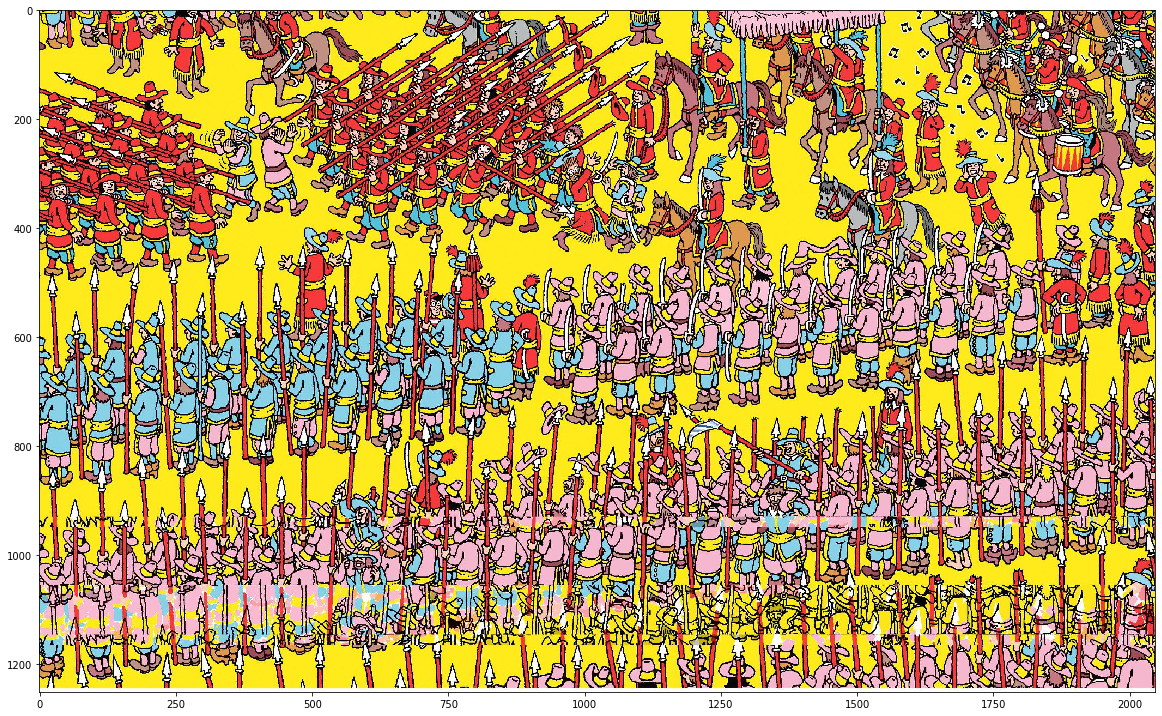

In [4]:
img1 = plt.imread(filename)
fig, ax = plt.subplots(figsize = (20, 20))
ax.imshow(img1)

# Cutout
Defines a function to create SxS pixel images (default is 64x64), given the original image and coordinates for the center. Then tests using the location of Waldo in the original full image loaded above.

In [114]:
def cutout(img, coords,S=64):
    hs=int(S/2)
    y = [coords[0] - hs, coords[0] + hs]
    x = [coords[1] - hs, coords[1] + hs]
    
    if y[0] < 0:
        y[0] = 0
        y[1] = S
        
    if y[1] > img.shape[1]:
        y[1] = img.shape[1] - 1
        y[0] = y[1] - S
      
    if x[0] < 0:
        x[0] = 0
        x[1] = S
        
    if x[1] > img.shape[0]:
        x[1] = img.shape[0] - 1
        x[0] = x[1] - S
    
    return img[x[0]:x[1], y[0]:y[1], :]

<IPython.core.display.Javascript object>

12288


<IPython.core.display.Javascript object>

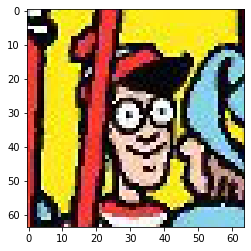

In [26]:
coords=[726,540] #location of waldo in first image
new_img=cutout(img1,coords,64)
print(np.size(new_img))
plt.imshow(new_img)

# Shift Image Cutouts

In [27]:
def genRCoords(center,shift=30):
    x=center[0]+randint(-shift,shift)
    y=center[1]+randint(-shift,shift)
    return [x,y]
    

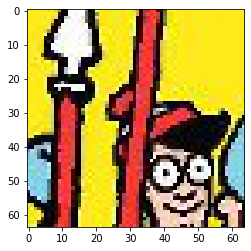

In [55]:
plt.imshow(cutout(img1,genRCoords(coords)))

# Loading all Waldo images + shifts

In [57]:
locs_name=os.path.join(os.getcwd(),"waldo_locations.csv")
locs=pd.read_csv(locs_name)

<IPython.core.display.Javascript object>

In [110]:
num_per_Waldo=100

filepath = os.path.join(os.getcwd(), "images", "original-images")
w=[]
for i in range(0,20):
    
    x = locs['x'].iloc[i]
    y = locs['y'].iloc[i]
    coords = [x, y]
    
    if coords[0] == 0:
        continue
        
    #print(coords)
    
    filename = os.path.join(filepath, str(i + 1) + ".jpg")
    img = plt.imread(filename)
    
    for j in range(num_per_Waldo):
        center = genRCoords(coords)
        cut_img = cutout(img, center)
        w.append(np.array(cut_img))
       
w=np.array(w)




5400

In [103]:
#Loads in waldo images (Not necessary if the above code works correctly)
#w = np.array([np.array(imread("./images/64/waldo2/"+fname)) for fname in os.listdir("./images/64/waldo2")])

#loads in not-waldo images...i'm trusting th original dataset here
nw = np.array([np.array(imread("./images/64/notwaldo/"+fname)) for fname in os.listdir("./images/64/notwaldo")])

In [112]:
data=[]
for im in w:
    data.append(im.flatten('F'))

df = pd.DataFrame(data)
df['waldo'] = 1


data=[]
for im in nw:
    data.append(im.flatten('F'))
    
df2=pd.DataFrame(data)
df2['waldo']=0

In [113]:
frames=[df,df2]
result = pd.concat(frames)
result.to_csv('AllWaldoC.csv',index=False)